In [1]:
import pandas as pd
df = pd.read_csv('house-prices.csv')

In [2]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#encode the string elements with number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns[df.dtypes==object].to_list():
    df[i] = le.fit_transform(df[i].astype(str))

In [4]:
#fill the NaN value with mean
from sklearn.impute import SimpleImputer
import numpy as np

ipt = SimpleImputer(missing_values=np.NaN, strategy='mean')
df = pd.DataFrame(ipt.fit_transform(df),columns=df.columns)

In [5]:
#prepare the training data
train_data = df.drop(['SalePrice','Id'],axis='columns')
train_label = pd.DataFrame(df['SalePrice'])

In [6]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3.0,65.000000,8450.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0
1,20.0,3.0,80.000000,9600.0,1.0,2.0,3.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0
2,60.0,3.0,68.000000,11250.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0
3,70.0,3.0,60.000000,9550.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0
4,60.0,3.0,84.000000,14260.0,1.0,2.0,0.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0
5,50.0,3.0,85.000000,14115.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,2.0,2.0,700.0,10.0,2009.0,8.0,4.0
6,20.0,3.0,75.000000,10084.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0
7,60.0,3.0,70.049958,10382.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,2.0,350.0,11.0,2009.0,8.0,4.0
8,50.0,4.0,51.000000,6120.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2008.0,8.0,0.0
9,190.0,3.0,50.000000,7420.0,1.0,2.0,3.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,1.0,2008.0,8.0,4.0


In [7]:
#split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,train_label,test_size=0.3)

In [8]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,20.0,1.0,62.000000,7500.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,10.0,2009.0,8.0,4.0
503,20.0,3.0,100.000000,15602.0,1.0,2.0,0.0,3.0,0.0,4.0,...,161.0,0.0,3.0,1.0,4.0,0.0,3.0,2010.0,8.0,4.0
627,80.0,3.0,80.000000,9600.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,3.0,2010.0,8.0,4.0
850,120.0,4.0,36.000000,4435.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,11.0,2007.0,8.0,4.0
567,20.0,3.0,70.000000,10171.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,3.0,2010.0,8.0,4.0
43,20.0,3.0,70.049958,9200.0,1.0,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,3.0,2.0,4.0,0.0,7.0,2008.0,8.0,4.0
985,190.0,3.0,68.000000,10880.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2008.0,3.0,4.0
940,90.0,3.0,55.000000,12640.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,7.0,2006.0,8.0,4.0
707,120.0,3.0,48.000000,6240.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2009.0,8.0,4.0
1400,50.0,4.0,50.000000,6000.0,1.0,2.0,3.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,7.0,2008.0,8.0,4.0


In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.linear_model import LinearRegression
linearR_model = LinearRegression()
linearR_model.fit(X_train,y_train)
linear_result = linearR_model.predict(X_test)

print("linear regression model score:")
linearR_model.score(X_test,y_test)

linear regression model score:


0.7597407061431536

In [11]:
mean_squared_error(y_test,linear_result)

1452088321.3724177

In [12]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1)
clf.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [13]:
print("Ridge score:")
clf.score(X_test,y_test)

Ridge score:


0.7762887485926067

In [14]:
mean_squared_error(y_test,clf.predict(X_test))

1352074628.6794593

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [16]:
print("Lasso score:")
lasso.score(X_test,y_test)

Lasso score:


0.7599167181055181

In [17]:
mean_squared_error(y_test,lasso.predict(X_test))

1451024533.5335855

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_test.iloc[:,0], y_test.iloc[:,0], color='black')

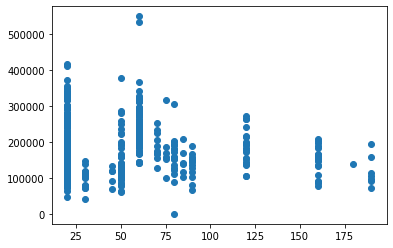

In [19]:
plt.scatter(X_test.iloc[:,0],clf.predict(X_test))

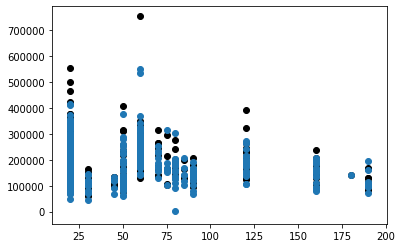

In [20]:
plt.scatter(X_test.iloc[:,0], y_test.iloc[:,0], color='black')
plt.scatter(X_test.iloc[:,0],clf.predict(X_test))

In [21]:
from sklearn import preprocessing

In [22]:
preprod_data = preprocessing.scale(train_data)
preprod_label = preprocessing.scale(train_label)
X_train, X_test, y_train, y_test = train_test_split(preprod_data,preprod_label,test_size=0.3)

In [23]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5509597099416652

In [24]:
mean_squared_error(y_test,clf.predict(X_test))

0.42129810576201476

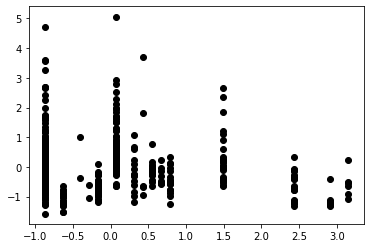

In [25]:
plt.scatter(X_test[:,0], y_test, color='black')

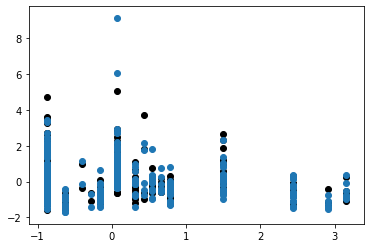

In [26]:
plt.scatter(X_test[:,0], y_test, color='black')
plt.scatter(X_test[:,0],clf.predict(X_test))

In [27]:
correlation_matrix = df.corr().nlargest(6,'SalePrice')

In [28]:
correlation_matrix.axes[0]

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

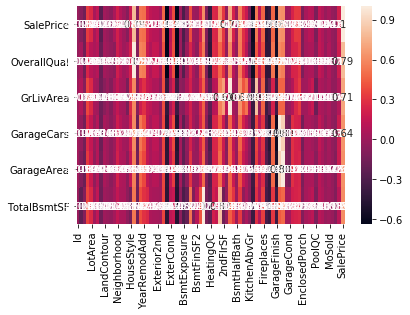

In [29]:
import seaborn as sns
ax = sns.heatmap(correlation_matrix, annot=True)

In [30]:
train_data_cor = pd.DataFrame(df[correlation_matrix.axes[0]].drop(['SalePrice'],axis='columns'))
train_label = pd.DataFrame(df['SalePrice'])

In [31]:
train_data_cor

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7.0,1710.0,2.0,548.0,856.0
1,6.0,1262.0,2.0,460.0,1262.0
2,7.0,1786.0,2.0,608.0,920.0
3,7.0,1717.0,3.0,642.0,756.0
4,8.0,2198.0,3.0,836.0,1145.0
5,5.0,1362.0,2.0,480.0,796.0
6,8.0,1694.0,2.0,636.0,1686.0
7,7.0,2090.0,2.0,484.0,1107.0
8,7.0,1774.0,2.0,468.0,952.0
9,5.0,1077.0,1.0,205.0,991.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_data_cor,train_label,test_size=0.3)
clf = Ridge(alpha=1)
clf.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [33]:
clf.score(X_test,y_test)

0.780337450433575

In [34]:
mean_squared_error(y_test,clf.predict(X_test))

1282311633.2739916

In [35]:
linearR_model = LinearRegression()
linearR_model.fit(X_train,y_train)
linear_result = linearR_model.predict(X_test)

print("linear regression model score:")
linearR_model.score(X_test,y_test)

linear regression model score:


0.7802800882681061

In [36]:
mean_squared_error(y_test,linear_result)

1282646493.1407998

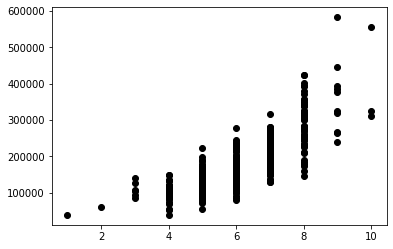

In [37]:
plt.scatter(X_test.iloc[:,0], y_test.iloc[:,0], color='black')

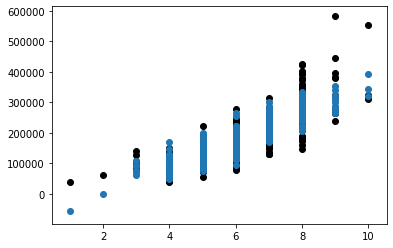

In [38]:
plt.scatter(X_test.iloc[:,0], y_test.iloc[:,0], color='black')
plt.scatter(X_test.iloc[:,0],clf.predict(X_test))

In [39]:
correlation_matrix = df.corr().nsmallest(5,'SalePrice')

In [40]:
correlation_matrix

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
ExterQual,0.001689,-0.017161,0.200536,-0.183293,-0.057275,0.049976,-0.087306,0.148818,-0.003613,0.017369,...,-0.034193,0.028192,-0.210470,-0.022023,0.010166,-0.024720,-0.036300,0.087012,-0.188571,-0.636884
BsmtQual,0.048324,-0.036780,0.125629,-0.166732,-0.066085,-0.025811,-0.073228,0.168577,-0.002929,0.020227,...,-0.029680,0.032347,-0.192250,-0.072582,0.037437,-0.008056,0.029369,0.065410,-0.180480,-0.620886
KitchenQual,-0.004432,0.010129,0.128976,-0.189082,-0.057018,-0.025307,-0.029485,0.122182,0.030813,-0.010717,...,-0.058821,0.066990,-0.137522,-0.068671,0.036970,-0.038072,-0.009706,0.038590,-0.134391,-0.589189
GarageFinish,-0.013821,0.033077,0.167695,-0.217695,-0.124756,-0.015529,-0.182637,0.229283,-0.093965,-0.008338,...,-0.028774,0.025617,-0.130075,-0.028268,0.003352,0.000683,-0.001467,0.050993,-0.182548,-0.549247
FireplaceQu,0.007590,0.058036,0.017208,-0.191981,-0.151305,-0.024278,-0.076354,0.138239,0.050234,-0.033787,...,-0.075821,0.071251,-0.043041,-0.069178,0.034769,-0.062022,0.044449,0.033210,-0.137252,-0.459605


In [41]:
train_data_cor = pd.DataFrame(df[correlation_matrix.axes[0]])

In [47]:
train_data_cor

,ExterQual,BsmtQual,KitchenQual,GarageFinish,FireplaceQu
0,2.0,2.0,2.0,1.0,5.0
1,3.0,2.0,3.0,1.0,4.0
2,2.0,2.0,2.0,1.0,4.0
3,3.0,3.0,2.0,2.0,2.0
4,2.0,2.0,2.0,1.0,4.0
5,3.0,2.0,3.0,2.0,5.0
6,2.0,0.0,2.0,1.0,2.0
7,3.0,2.0,3.0,1.0,4.0
8,3.0,3.0,3.0,2.0,4.0
9,3.0,3.0,3.0,1.0,4.0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_data_cor,train_label,test_size=0.3)
clf = Ridge(alpha=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5632191682423583

In [49]:
mean_squared_error(y_test,clf.predict(X_test))

3366189996.887858

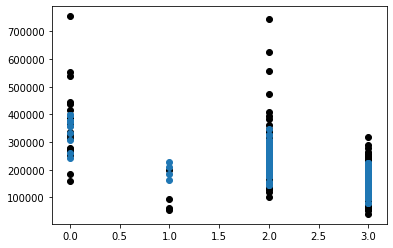

In [50]:
plt.scatter(X_test.iloc[:,0], y_test.iloc[:,0], color='black')
plt.scatter(X_test.iloc[:,0],clf.predict(X_test))

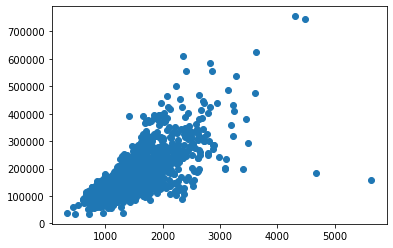

In [51]:
plt.scatter(train_data['GrLivArea'],df['SalePrice'])

In [52]:
#find outliers
Q1=df.quantile(0.4)
Q3=df.quantile(0.6)
IQR=Q3-Q1
o=(df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))
o['GrLivArea']
#True == outliers

0       False
1       False
2       False
3       False
4        True
5       False
6       False
7        True
8       False
9       False
10      False
11       True
12       True
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29       True
        ...  
1430    False
1431     True
1432     True
1433    False
1434    False
1435    False
1436     True
1437    False
1438    False
1439    False
1440     True
1441     True
1442     True
1443     True
1444    False
1445     True
1446    False
1447     True
1448    False
1449     True
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456     True
1457     True
1458    False
1459    False
Name: GrLivArea, Length: 1460, dtype: bool

In [53]:
#now get rid of outliers
nooutlier = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))]

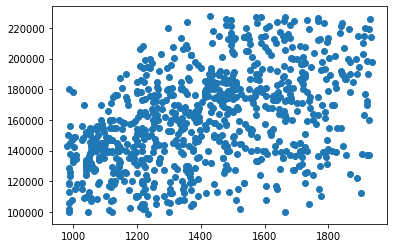

In [54]:
plt.scatter(nooutlier['GrLivArea'],nooutlier['SalePrice'])